
# **Supervised Learning Algorithms- Linear Regression(Multi-Variant):**
*   Consider a dataset from UCI repository.
*   Create a **Multiple Linear Regression model** using the training data set.
*   Predict the scores on the test data and output RMSE and R Squared Score.
*   Include appropriate code snippets to visualize the model.
*   Interpret the result.
*   Write the Inference.
# **Step 1: Reading Data Using Pandas**
Display first five and last five records in the dataset

Check the shape of the DataFrame (rows, columns)



Refer this Link to execute on GOOGLE COLAB :- https://colab.research.google.com/drive/1fRll91zVeYOPUZd2AUfeEmfGdvhCzrfE?usp=sharing

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data = pd.read_csv("Advertising.csv")
data.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


# **Step 2: Interpret the data**
**What are the features?**

**1) TV:** advertising dollars spent on TV for a single product in a given market (in thousands of dollars)

**2) Radio:** advertising dollars spent on Radio

**3) Newspaper:** advertising dollars spent on Newspaper

**What is the response?**

**Sales:** sales of a single product in a given market (in thousands of items)

**Inference**

Because the response variable is *continuous*, this is a *regression problem*.
There are 200 observations (represented by the rows), and each observation is a single market.

# **Step 3: Process Dataset & Apply Linear Regression**


*   Pre-process by dropping unwanted columns
*   Split Dataset into test and train set


In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
Xs = data.drop(['Unnamed: 0'], axis=1)
y = data['sales'].values.reshape(-1, 1)
#x_train, x_test, y_train, y_test = train_test_split(Xs,y,test_size = 0.3) #Train is 70% and Test is 30%

# random_stateint, RandomState instance or None, default=None
# Controls the shuffling applied to the data before applying the split. Pass an int for reproducible output across multiple function calls.

# default split is 75% for training and 25% for testing

x_train, x_test, y_train, y_test = train_test_split(Xs, y, random_state=1)
# 200 records : 75% train = 150 and 25% test = 50

reg = LinearRegression()
reg.fit(x_train, y_train)

LinearRegression()

# **Step 4: Display Values of Slope and Intercept and Infer from it**

**Linear Model is: y=2.88+0.0466×TV+0.179×Radio+0.00345×Newspaper**

This is a Multi-Variant Linear Regression Model Equation. 

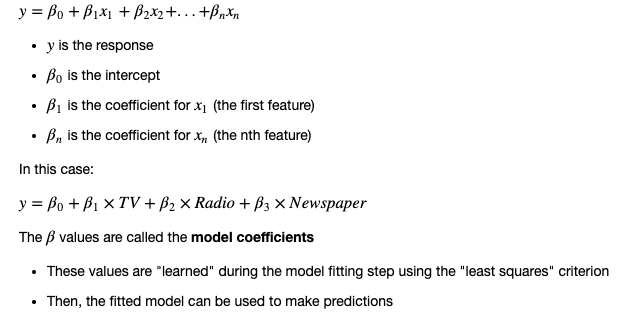
 
**Inference 1** 
Meaning of Coefficient 

E.g. TV Coefficient 0.0466

For a given amount of Radio and Newspaper ad spending, a "unit" increase in TV ad spending is associated with a 0.0466 "unit" increase in Sales.
Or more clearly: For a given amount of Radio and Newspaper ad spending, an additional $1,000 spent on TV ads is associated with an increase in sales of 46.6 items.

How $1,000? 
46.6 Units = 0.0466 x 1000 

**Inference 2**

If an increase in TV ad spending was associated with a decrease in sales,  β1  would be negative.

In [6]:
print("Slope: ",reg.coef_)
print("Intercept: ",reg.intercept_)
print("The linear model is: Y = {:.5} + {:.5}*TV + {:.5}*radio + {:.5}*newspaper".format(reg.intercept_[0], reg.coef_[0][0], reg.coef_[0][1], reg.coef_[0][2]))

Slope:  [[ 6.13667024e-17  3.33066907e-16 -7.80158302e-18  1.00000000e+00]]
Intercept:  [-3.55271368e-15]
The linear model is: Y = -3.5527e-15 + 6.1367e-17*TV + 3.3307e-16*radio + -7.8016e-18*newspaper


# **Predict the sales when the amount spent on  TV , Radio and Newspaper are given given**

In [8]:
def myfunc(TV, radio, newspaper):
  Y = 2.877 + 0.046565*TV + 0.17916*radio + 0.0034505*newspaper
  return Y
predictedsales = myfunc(39.5, 41.1, 10.8)
print("Predicted Sales is ", predictedsales)

Predicted Sales is  12.117058900000002


# **Predict the sales when the amount spent on  TV and Radio are given given**

In [9]:
def myfunc(TV, radio):
  Y = Y = 2.927 + 0.0466*TV + 0.1811*radio
  return Y
predictedsales = myfunc(39.5, 41.1)
print("Predicted Sales is ", predictedsales)

Predicted Sales is  12.21091



# **Step 6: Model Evaluation Metrics for Regression**
**Note:** Evaluation metrics for classification problems, such as accuracy, are not useful for regression problems. Instead, we need evaluation metrics designed for comparing continuous values.

Three common evaluation metrics for regression problems are:

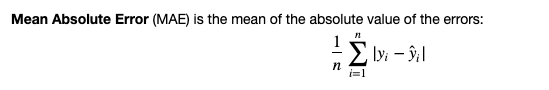

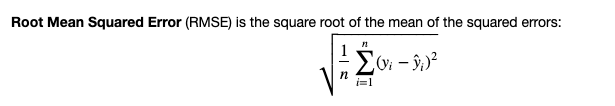

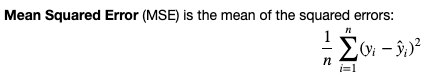



**Comparing these metrics:**

**MAE** is the easiest to understand, because it's the average error.

**MSE** is more popular than MAE, because ***MSE "punishes" larger errors***.

**RMSE** is even more popular than MSE, because ***RMSE is interpretable in the "y" units***. Easier to put in context as it's the same units as our response variable

# **Finding the MAE,MSE,RMSE when all the parameters are considered**

In [10]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

predictions = reg.predict(x_test)
print(f"Mean Absolute Error = {mean_absolute_error(y_test, predictions):.3f} ")
print(f"Mean Squared Error = {mean_squared_error(y_test, predictions):.3f}")
print(f"Root Mean Squared Error = {np.sqrt(mean_squared_error(y_test, predictions)):.3f}")

reg.score(Xs, y)  # Return the coefficient of determination of the prediction.

Mean Absolute Error = 0.000 
Mean Squared Error = 0.000
Root Mean Squared Error = 0.000


1.0

# **Step : Visualize the data**

Using seaborn package as it has advanced visualization features 

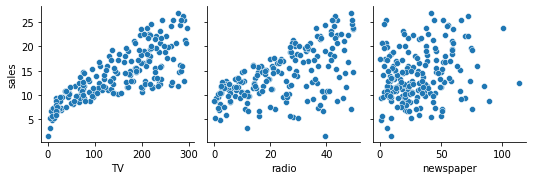

In [11]:
# conventional way to import seaborn
import seaborn as sns

# allow plots to appear within the notebook
%matplotlib inline

# visualize the relationship between the features and the response using scatterplots
# this produces pairs of scatterplot as shown
# use aspect= to control the size of the graphs
# use kind='reg' to plot linear regression on the graph

# {x, y}_varslists of variable names :- Variables within data to use separately for the rows and columns of the figure; i.e. to make a non-square plot.
# kind{‘scatter’, ‘kde’, ‘hist’, ‘reg’} :- Kind of plot to make.

sns.pairplot(data, x_vars=['TV', 'radio', 'newspaper'], y_vars='sales')


# Previously predictions has been done for all the variables 
# **Below represent the prediction and all other stuffs for data that conatins only TV and RADIO**

In [12]:
feature_cols = ['TV', 'radio']  # create a Python list of feature names
# use the list to select a subset of the original DataFrame
X = data[feature_cols]
Y = data.sales
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=1)
reg.fit(X_train, Y_train)

print("Slope: ", reg.coef_)
print("Intercept: ", reg.intercept_)
print("The linear model is: Y = 2.927 + 0.0466*TV + 0.1811*radio")

# make predictions on the testing set
Y_pred = reg.predict(X_test)

Slope:  [0.04660234 0.18117959]
Intercept:  2.9272373202664816
The linear model is: Y = 2.927 + 0.0466*TV + 0.1811*radio


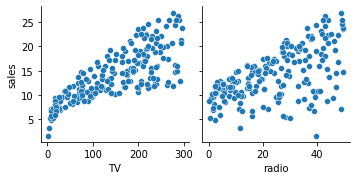

In [13]:
import seaborn as sns
%matplotlib inline
sns.pairplot(data, x_vars=['TV', 'radio'], y_vars='sales')

# Calculating the various metrics for measuring the performance of a regression model

In [15]:
predictions = reg.predict(X_test)
print("Mean Absolute Error = {mean_absolute_error(Y_test, predictions):.3f} ")
print("Mean Absolute Error = {mean_squared_error(Y_test, predictions):.3f}")
print("Root Mean Squared Error = {np.sqrt(mean_squared_error(Y_test, Y_pred)):.3f}")

reg.score(X, y)

Mean Absolute Error = {mean_absolute_error(Y_test, predictions):.3f} 
Mean Absolute Error = {mean_squared_error(Y_test, predictions):.3f}
Root Mean Squared Error = {np.sqrt(mean_squared_error(Y_test, Y_pred)):.3f}


0.8966248862712952

# **Inference:**
The RMSE decreased when we removed Newspaper from the model. (Error is something we want to minimize, so a lower number for RMSE is better.

Thus, it is unlikely that this feature (Newspaper)is useful for predicting Sales, and should be removed from the model.